# 项目实现（数据分析+RF+lightGBM）

In [1]:
# 导入数据基本处理阶段需要用到的api
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# 导入数据，且查看数据的基本信息
train = pd.read_csv("./data/train_V2.csv")
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [3]:
train.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0,0,0.000,0,0,1019.0,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0,0,0.000,0,0,81.7,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0,0,2.184,0,0,788.7,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0,0,0.000,0,0,2748.0,8,0,0.8000
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00,0,0,1,18,...,0,1369.0,0,0.000,0,0,1244.0,5,0,0.5464


In [4]:
train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [6]:
train.shape
(4446966, 29)

(4446966, 29)

In [7]:
# 查看一共有多少场比赛
np.unique(train["matchId"]).shape

(47965,)

In [8]:
# 查看一共有多少组
np.unique(train["groupId"]).shape

(2026745,)

# 数据基本处理

数据缺失值处理

查看目标值，我们发现有一条样本，比较特殊，其“winplaceperc”的值为NaN，也就是目标值是缺失值，

因为只有一个玩家是这样，直接进行删除处理。

In [9]:
# 查看缺失值
np.any(train.isnull())

True

In [10]:
# 通过上面方法查看,发现只有"'winPlacePerc"列有缺失值;

# 寻找缺失值行
train[train['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [11]:
# 删除缺失值
train.drop(2744604, inplace=True)
train.shape

(4446965, 29)

# 特征数据规范化处理

处理完缺失值之后，我们看一下每场参加的人数会有多少呢，是每次都会匹配100个人，才开始游戏吗？

In [12]:
# 显示每场比赛参加人数
# transform的作用类似实现了一个一对多的映射功能，把统计数量映射到对应的每个样本上
count = train.groupby('matchId')['matchId'].transform('count')

train['playersJoined'] = count

count.count()

4446965

In [13]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


In [14]:
# 通过每场参加人数进行，按值升序排列
train["playersJoined"].sort_values().head()
# 通过结果发现，最少的一局，竟然只有两个人

1206365    2
2109739    2
3956552    5
3620228    5
696000     5
Name: playersJoined, dtype: int64

D:\anaconda3\envs\py36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


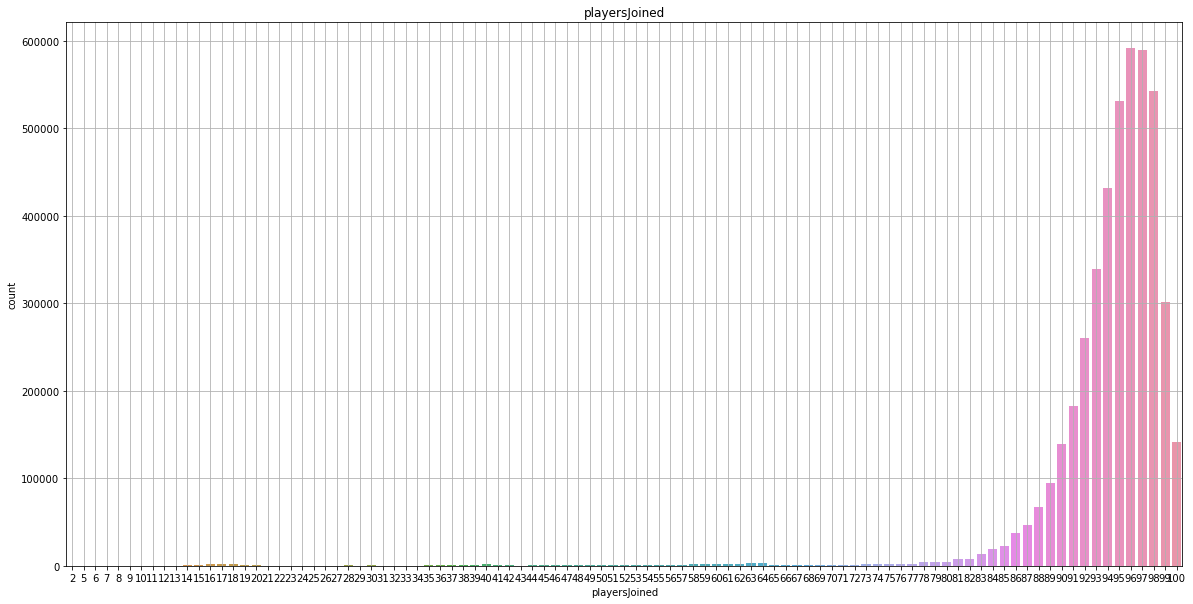

In [15]:
# 通过绘制图像，查看每局开始人数
# 通过seaborn下的countplot方法，可以直接绘制统计过数量之后的直方图
plt.figure(figsize=(20,10))
sns.countplot(train['playersJoined'])
plt.title('playersJoined')
plt.grid()
plt.show()

通过观察，发现一局游戏少于75个玩家，就开始的还是比较少

同时大部分游戏都是在接近100人的时候才开始

限制每局开始人数大于等于75，再进行绘制。

猜想：把这些数据在后期加入数据处理，应该会得到的结果更加准确一些

D:\anaconda3\envs\py36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


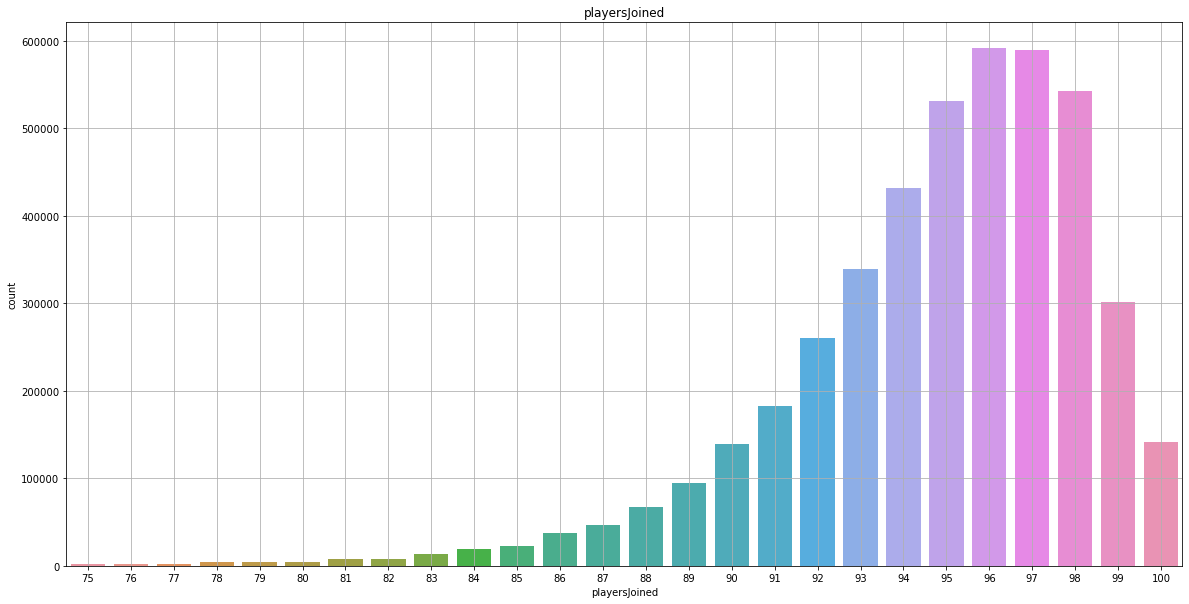

In [16]:
# 再次绘制每局参加人数的直方图
plt.figure(figsize=(20,10))
sns.countplot(train[train['playersJoined']>=75]['playersJoined'])
plt.title('playersJoined')
plt.grid()
plt.show()

# 规范化输出部分数据

现在我们统计了“每局玩家数量”，那么我们就可以通过“每局玩家数量”来进一步考证其它特征，同时对其规范化设置

试想：一局只有70个玩家的杀敌数，和一局有100个玩家的杀敌数，应该是不可以同时比较的

可以考虑的特征值包括

1.kills（杀敌数）

2.damageDealt（总伤害）

3.maxPlace（本局最差名次）

4.matchDuration（比赛时长）

In [17]:
# 对部分特征值进行规范化
train['killsNorm'] = train['kills']*((100-train['playersJoined'])/100 + 1)
train['damageDealtNorm'] = train['damageDealt']*((100-train['playersJoined'])/100 + 1)
train['maxPlaceNorm'] = train['maxPlace']*((100-train['playersJoined'])/100 + 1)
train['matchDurationNorm'] = train['matchDuration']*((100-train['playersJoined'])/100 + 1)

# 比较经过规范化的特征值和原始特征值的值
to_show = ['Id', 'kills','killsNorm','damageDealt', 'damageDealtNorm', 'maxPlace', 'maxPlaceNorm', 'matchDuration', 'matchDurationNorm']
train[to_show][0:11]

,Id,kills,killsNorm,damageDealt,damageDealtNorm,maxPlace,maxPlaceNorm,matchDuration,matchDurationNorm
0,7f96b2f878858a,0,0.00,0.000,0.00000,28,29.12,1306,1358.24
1,eef90569b9d03c,0,0.00,91.470,99.70230,26,28.34,1777,1936.93
2,1eaf90ac73de72,0,0.00,68.000,69.36000,50,51.00,1318,1344.36
3,4616d365dd2853,0,0.00,32.900,35.86100,31,33.79,1436,1565.24
4,315c96c26c9aac,1,1.03,100.000,103.00000,97,99.91,1424,1466.72
5,ff79c12f326506,1,1.05,100.000,105.00000,28,29.40,1395,1464.75
6,95959be0e21ca3,0,0.00,0.000,0.00000,28,28.84,1316,1355.48
7,311b84c6ff4390,0,0.00,8.538,8.87952,96,99.84,1967,2045.68
8,1a68204ccf9891,0,0.00,51.600,53.14800,28,28.84,1375,1416.25
9,e5bb5a43587253,0,0.00,37.270,38.38810,29,29.87,1930,1987.90


# 部分变量合成

此处我们把特征：heals(使用治疗药品数量)和boosts(能量、道具使用数量)合并成一个新的变量，命名：”healsandboosts“， 这是一个探索性过程，最后结果不一定有用，如果没有实际用处，最后再把它删除。

In [18]:
# 创建新变量“healsandboosts”
train['healsandboosts'] = train['heals'] + train['boosts']

In [19]:
train[["heals", "boosts", "healsandboosts"]].head()

,heals,boosts,healsandboosts
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


# 异常值处理

异常值处理：删除有击杀，但是完全没有移动的玩家

异常数据处理：

一些行中的数据统计出来的结果非常反常规，那么这些玩家肯定有问题，为了训练模型的准确性，我们会把这些异常数据剔除

通过以下操作，识别出玩家在游戏中有击杀数，但是全局没有移动；

这类型玩家肯定是存在异常情况，我们把这些玩家删除。

In [20]:
# 创建新变量，统计玩家移动距离
train['totalDistance'] = train['rideDistance'] + train['walkDistance'] + train['swimDistance']
# 创建新变量，统计玩家是否在游戏中，有击杀，但是没有移动，如果是返回True, 否则返回false
train['killsWithoutMoving'] = ((train['kills'] > 0) & (train['totalDistance'] == 0))

In [21]:
train["killsWithoutMoving"].head()

0    False
1    False
2    False
3    False
4    False
Name: killsWithoutMoving, dtype: bool

In [22]:
train["killsWithoutMoving"].describe()


count     4446965
unique          2
top         False
freq      4445430
Name: killsWithoutMoving, dtype: object

In [23]:
# 检查是否存在有击杀但是没有移动的数据
train[train['killsWithoutMoving'] == True].shape

(1535, 37)

In [24]:
train[train['killsWithoutMoving'] == True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0,0.8571,58,8.52,842.060,21.30,842.06,3,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0,0.6000,42,4.74,547.628,17.38,2834.52,6,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0,0.8947,21,35.80,3132.500,35.80,1607.42,5,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,1500,0.0000,73,1.27,200.406,24.13,1014.73,0,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0,0.3000,42,1.58,158.000,17.38,2834.52,0,0.0,True


In [25]:
# 删除这些数据
train.drop(train[train['killsWithoutMoving'] == True].index, inplace=True)

In [26]:
# 异常值处理：删除驾车杀敌数异常的数据
# 查看载具杀敌数超过十个的玩家
train[train['roadKills'] > 10]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving
2733926,c3e444f7d1289f,489dd6d1f2b3bb,4797482205aaa4,0,0,1246.0,0,0,0,1,...,1371,0.4286,92,15.12,1345.68,99.36,1572.48,0,1282.302,False
2767999,34193085975338,bd7d50fa305700,a22354d036b3d6,0,0,1102.0,0,0,0,1,...,1533,0.4713,88,12.32,1234.24,98.56,2179.52,0,4934.600,False
2890740,a3438934e3e535,1081c315a80d14,fe744430ac0070,0,8,2074.0,0,1,11,1,...,1568,1.0000,38,32.40,3359.88,61.56,3191.40,19,5876.000,False
3524413,9d9d044f81de72,8be97e1ba792e3,859e2c2db5b125,0,3,1866.0,0,5,7,1,...,1606,0.9398,84,20.88,2164.56,97.44,2233.00,10,7853.000,False


In [27]:
# 删除这些数据
train.drop(train[train['roadKills'] > 10].index, inplace=True)

In [28]:
train.shape

(4445426, 37)

D:\anaconda3\envs\py36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


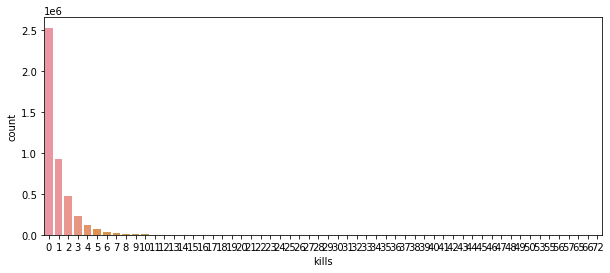

In [29]:
# 异常值处理：删除玩家在一局中杀敌数超过30人的数据
# 首先绘制玩家杀敌数的条形图
plt.figure(figsize=(10,4))
sns.countplot(train["kills"])
plt.show()

In [30]:
train[train['kills'] > 30].shape

(95, 37)

In [31]:
train[train['kills'] > 30].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving
57978,9d8253e21ccbbd,ef7135ed856cd8,37f05e2a01015f,9,0,3725.0,0,7,0,2,...,1500,0.8571,16,64.40,6854.00,14.72,3308.32,0,48.82,False
87793,45f76442384931,b3627758941d34,37f05e2a01015f,8,0,3087.0,0,8,27,3,...,1500,1.0000,16,57.04,5680.08,14.72,3308.32,27,780.70,False
156599,746aa7eabf7c86,5723e7d8250da3,f900de1ec39fa5,21,0,5479.0,0,12,7,4,...,0,0.7000,11,90.72,10355.31,20.79,3398.22,7,23.71,False
160254,15622257cb44e2,1a513eeecfe724,db413c7c48292c,1,0,4033.0,0,40,0,1,...,1500,1.0000,62,57.96,5565.54,11.04,1164.72,0,718.30,False
180189,1355613d43e2d0,f863cd38c61dbf,39c442628f5df5,5,0,3171.0,0,6,15,1,...,0,1.0000,11,66.15,5993.19,17.01,3394.44,15,71.51,False


In [32]:
# 异常值处理：删除爆头率异常数据
# 如果一个玩家的击杀爆头率过高，也说明其有问题

# 创建变量爆头率
train['headshot_rate'] = train['headshotKills'] / train['kills']
train['headshot_rate'] = train['headshot_rate'].fillna(0)

In [33]:
train["headshot_rate"].tail()

4446961    0.0
4446962    0.0
4446963    0.0
4446964    0.5
4446965    0.0
Name: headshot_rate, dtype: float64

D:\anaconda3\envs\py36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


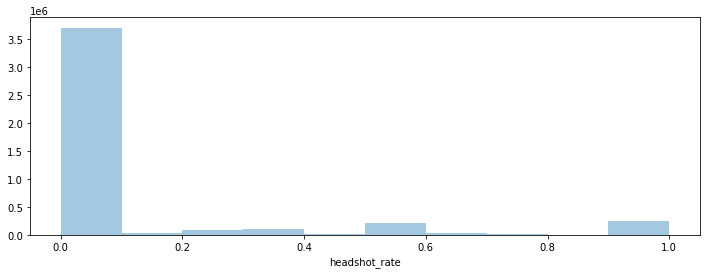

In [34]:
# 绘制爆头率图像
plt.figure(figsize=(12,4))
sns.distplot(train['headshot_rate'], bins=10, kde=False)
plt.show()

In [35]:
train[(train['headshot_rate'] == 1) & (train['kills'] > 9)].shape

(24, 38)

In [36]:
train[(train['headshot_rate'] == 1) & (train['kills'] > 9)].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
281570,ab9d7168570927,add05ebde0214c,e016a873339c7b,2,3,1212.0,8,10,0,1,...,0.8462,93,10.70,1296.84,28.89,1522.61,3,2939.0,False,1.0
346124,044d18fc42fc75,fc1dbc2df6a887,628107d4c41084,3,5,1620.0,13,11,3,1,...,1.0000,96,11.44,1684.80,28.08,1796.08,8,8142.0,False,1.0
871244,e668a25f5488e3,5ba8feabfb2a23,f6e6581e03ba4f,0,4,1365.0,9,13,0,1,...,1.0000,98,13.26,1392.30,27.54,1280.10,4,2105.0,False,1.0
908815,566d8218b705aa,a9b056478d71b2,3a41552d553583,2,5,1535.0,10,10,3,1,...,0.9630,95,10.50,1611.75,29.40,1929.90,8,7948.0,False,1.0
963463,1bd6fd288df4f0,90584ffa22fe15,ba2de992ec7bb8,2,6,1355.0,12,10,2,1,...,1.0000,96,10.40,1409.20,28.08,1473.68,8,3476.0,False,1.0


In [37]:
train.drop(train[(train['headshot_rate'] == 1) & (train['kills'] > 9)].index, inplace=True)

D:\anaconda3\envs\py36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


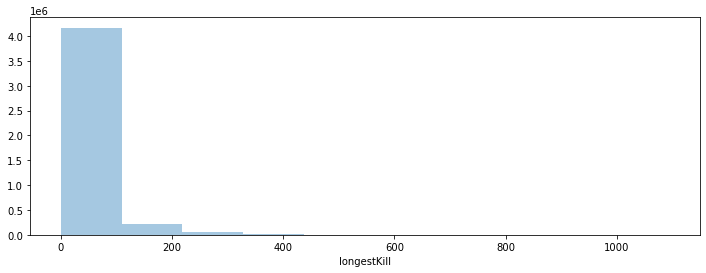

In [38]:
# 异常值处理：删除最远杀敌距离异常数据
# 绘制图像
plt.figure(figsize=(12,4))
sns.distplot(train['longestKill'], bins=10, kde=False)
plt.show()

In [39]:
# 找出最远杀敌距离大于等于1km的玩家
train[train['longestKill'] >= 1000].shape
(20, 38)

(20, 38)

In [40]:
train[train['longestKill'] >= 1000]["longestKill"].head()

202281    1000.0
240005    1004.0
324313    1026.0
656553    1000.0
803632    1075.0
Name: longestKill, dtype: float64

In [41]:
train.drop(train[train['longestKill'] >= 1000].index, inplace=True)
train.shape

(4445382, 38)

In [42]:
# 异常值处理：删除关于运动距离的异常值
# 距离整体描述
train[['walkDistance', 'rideDistance', 'swimDistance', 'totalDistance']].describe()

,walkDistance,rideDistance,swimDistance,totalDistance
count,4.445382e+06,4.445382e+06,4.445382e+06,4.445382e+06
mean,1.154607e+03,6.063168e+02,4.510805e+00,1.765435e+03
std,1.183502e+03,1.498553e+03,3.050706e+01,2.183238e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.554000e+02,0.000000e+00,0.000000e+00,1.584000e+02
50%,6.863000e+02,0.000000e+00,0.000000e+00,7.892000e+02
75%,1.977000e+03,2.559750e-01,0.000000e+00,2.729000e+03
max,2.578000e+04,4.071000e+04,3.823000e+03,4.127010e+04


In [43]:
# 行走距离处理

train[train['walkDistance'] >= 10000].shape

(219, 38)

In [44]:
train[train['walkDistance'] >= 10000].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
23026,8a6562381dd83f,23e638cd6eaf77,b0a804a610e9b0,0,1,0.00,0,0,0,44,...,0.8163,99,0.00,0.0000,99.99,1925.06,1,13540.3032,False,0.0
34344,5a591ecc957393,6717370b51c247,a15d93e7165b05,0,3,23.22,0,0,1,34,...,0.9474,65,0.00,31.3470,27.00,2668.95,4,10070.9073,False,0.0
49312,582685f487f0b4,338112cd12f1e7,d0afbf5c3a6dc9,0,4,117.20,1,0,1,24,...,0.9130,94,1.06,124.2320,49.82,2323.52,5,12446.7588,False,0.0
68590,8c0d9dd0b4463c,c963553dc937e9,926681ea721a47,0,1,32.34,0,0,1,46,...,0.8333,96,0.00,33.6336,50.96,1909.44,2,12483.6200,False,0.0
94400,d441bebd01db61,7e179b3366adb8,923b57b8b834cc,1,1,73.08,0,0,3,27,...,0.8194,73,0.00,92.8116,92.71,2293.62,4,11490.6300,False,0.0


In [45]:
train.drop(train[train['walkDistance'] >= 10000].index, inplace=True)

In [46]:
#载具行驶距离处理

train[train['rideDistance'] >= 20000].shape

train[train['rideDistance'] >= 20000].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
28588,6260f7c49dc16f,b24589f02eedd7,6ebea3b4f55b4a,0,0,99.2,0,0,1,30,...,0.6421,96,1.04,103.168,99.84,1969.76,1,26306.6,False,0.000000
63015,adb7dae4d0c10a,8ede98a241f30a,8b36eac66378e4,0,0,0.0,0,0,0,55,...,0.5376,94,0.00,0.000,99.64,2004.46,0,22065.4,False,0.000000
70507,ca6fa339064d67,f7bb2e30c3461f,3bfd8d66edbeff,0,0,100.0,0,0,0,26,...,0.8878,99,1.01,101.000,99.99,1947.28,0,28917.5,False,0.000000
72763,198e5894e68ff4,ccf47c82abb11f,d92bf8e696b61d,0,0,0.0,0,0,0,46,...,0.7917,97,0.00,0.000,99.91,1861.21,0,21197.2,False,0.000000
95276,c3fabfce7589ae,15529e25aa4a74,d055504340e5f4,0,7,778.2,0,1,2,2,...,0.9785,94,7.42,824.892,99.64,1986.44,9,26733.2,False,0.142857


In [47]:
train.drop(train[train['rideDistance'] >= 20000].index, inplace=True)

In [48]:
# 游泳距离处理

train[train['swimDistance'] >= 2000].shape
train[train['swimDistance'] >= 2000][["swimDistance"]]

,swimDistance
177973,2295.0
274258,2148.0
1005337,2718.0
1195818,2668.0
1227362,3823.0
1889163,2484.0
2065940,3514.0
2327586,2387.0
2784855,2206.0
3359439,2338.0


In [49]:
train.drop(train[train['swimDistance'] >= 2000].index, inplace=True)

In [50]:
# 异常值处理：武器收集异常值处理
train[train['weaponsAcquired'] >= 80].shape

(21, 38)

In [51]:
train[train['weaponsAcquired'] >= 80][['weaponsAcquired']].head()

,weaponsAcquired
233643,128
588387,80
1437471,102
1449293,95
1462706,83


In [52]:
train.drop(train[train['weaponsAcquired'] >= 80].index, inplace=True)

In [53]:
# 异常值处理：删除使用治疗药品数量异常值
train[train['heals'] >= 40].shape

train[train['heals'] >= 40][["heals"]].head()

,heals
18405,47
54463,43
126439,52
259351,42
268747,48


In [54]:
train.drop(train[train['heals'] >= 40].index, inplace=True)

In [55]:
train.shape

(4444845, 38)

# 类别型数据处理

比赛类型one-hot处理

In [56]:
# 关于比赛类型，共有16种方式
train['matchType'].unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-duo', 'normal-squad',
       'crashtpp', 'normal-solo'], dtype=object)

In [57]:
# 对matchType进行one_hot编码
# 通过在后面添加的方式,实现,赋值并不是替换
train = pd.get_dummies(train, columns=['matchType'])

In [58]:
train.shape

(4444845, 53)

In [59]:
# 通过正则匹配查看具体内容
matchType_encoding = train.filter(regex='matchType')
matchType_encoding.head()

,matchType_crashfpp,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


对groupId,matchId等数据进行处理

关于groupId,matchId这类型数据，也是类别型数据。但是它们的数据量特别多，如果你使用one-hot编码，无异于自杀。

在这儿我们把它们变成用数字统计的类别型数据依旧不影响我们正常使用。

In [60]:
# 把groupId 和 match Id 转换成类别类型 categorical types
# 就是把一堆不怎么好识别的内容转换成数字

# 转换group_id
train["groupId"].head()

0    4d4b580de459be
1    684d5656442f9e
2    6a4a42c3245a74
3    a930a9c79cd721
4    de04010b3458dd
Name: groupId, dtype: object

In [61]:
train['groupId'] = train['groupId'].astype('category')

In [62]:
train["groupId_cat"] = train["groupId"].cat.codes
train["groupId_cat"].head()

0     613602
1     827595
2     843286
3    1340092
4    1757361
Name: groupId_cat, dtype: int32

In [63]:
# 转换match_id
train['matchId'] = train['matchId'].astype('category')

train['matchId_cat'] = train['matchId'].cat.codes

# 删除之前列
train.drop(['groupId', 'matchId'], axis=1, inplace=True)

# 查看新产生列
train[['groupId_cat', 'matchId_cat']].head()

,groupId_cat,matchId_cat
0,613602,30085
1,827595,32751
2,843286,3143
3,1340092,45260
4,1757361,20531


In [64]:
train.head()

,Id,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,groupId_cat,matchId_cat
0,7f96b2f878858a,0,0,0.00,0,0,0,60,1241,0,...,0,0,0,0,0,0,0,1,613602,30085
1,eef90569b9d03c,0,0,91.47,0,0,0,57,0,0,...,0,0,0,0,0,0,0,1,827595,32751
2,1eaf90ac73de72,1,0,68.00,0,0,0,47,0,0,...,0,0,0,0,0,0,0,0,843286,3143
3,4616d365dd2853,0,0,32.90,0,0,0,75,0,0,...,0,0,0,0,0,0,0,1,1340092,45260
4,315c96c26c9aac,0,0,100.00,0,0,0,45,0,1,...,0,0,0,0,0,1,0,0,1757361,20531


# 数据截取

取部分数据进行使用（1000000）

取前100万条数据，进行训练

sample = 1000000

df_sample = train.sample(sample)

In [65]:
# 取前100万条数据，进行训练
sample = 1000000
df_sample = train.sample(sample)

In [66]:
# 确定特征值和目标值
df = df_sample.drop(["winPlacePerc", "Id"], axis=1) #all columns except target

y = df_sample['winPlacePerc'] # Only target variable

In [67]:
df.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,groupId_cat,matchId_cat
1699712,0,0,0.0,0,0,0,57,0,0,0,...,0,0,0,0,0,0,0,0,1429659,16881
1056002,0,2,100.0,0,0,0,28,1000,1,1,...,0,0,0,0,0,0,0,0,844284,26765
944511,1,5,104.8,1,0,12,24,0,1,1,...,0,0,0,0,0,0,0,1,1163624,30639
3387405,0,2,147.2,1,0,1,29,1560,1,1,...,0,0,0,0,0,0,0,0,133309,24113
1798182,0,0,0.0,0,0,0,94,1396,0,0,...,0,0,0,0,0,0,0,1,70163,32031


In [68]:
y.head()

1699712    0.4681
1056002    0.7959
944511     0.9630
3387405    0.5556
1798182    0.1034
Name: winPlacePerc, dtype: float64

In [69]:
# 分割训练集和测试集
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(df, y, test_size=0.2)

In [70]:
# 机器学习（模型训练）和评估
# 导入需要训练和评估api
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [71]:
# 初步使用随机森林进行模型训练
# 模型训练
m1 = RandomForestRegressor(n_estimators=40, 
                           min_samples_leaf=3, 
                           max_features='sqrt',
                           n_jobs=-1)
# n_jobs=-1 表示训练的时候，并行数和cpu的核数一样，如果传入具体的值，表示用几个核去跑

m1.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=3, n_estimators=40,
                      n_jobs=-1)

In [72]:
y_pre = m1.predict(X_valid)
m1.score(X_valid, y_valid)

0.9211461277398771

In [73]:
mean_absolute_error(y_true=y_valid, y_pred=y_pre)

0.06132048447047763

# 再次使用随机森林，进行模型训练

减少特征值，提高模型训练效率

In [74]:
# 查看特征值在当前模型中的重要程度
m1.feature_importances_

array([3.23327098e-03, 5.40975355e-02, 1.45367418e-02, 4.45269837e-03,
       1.54412184e-03, 4.88890220e-02, 1.90858339e-01, 1.97619436e-03,
       1.36018801e-02, 3.75641074e-03, 2.48246156e-02, 1.09063965e-02,
       5.88651541e-03, 7.46168489e-03, 3.77538619e-03, 6.75082026e-04,
       1.46048104e-02, 2.87010300e-05, 2.73637759e-03, 1.12947067e-04,
       1.86225314e-05, 2.43983449e-01, 4.51766821e-02, 2.23613269e-03,
       6.43080350e-03, 7.47281527e-03, 1.19739629e-02, 6.66635126e-03,
       1.19843785e-02, 5.06194909e-02, 1.90117034e-01, 0.00000000e+00,
       2.69665228e-03, 5.14539300e-05, 1.13380053e-06, 2.28493372e-04,
       5.15167600e-04, 2.68465263e-07, 2.43678285e-06, 1.23737248e-07,
       8.28479921e-05, 1.96253744e-07, 1.17675418e-05, 1.26000270e-06,
       2.51361942e-04, 2.55051053e-04, 1.20000817e-03, 1.07769771e-03,
       8.96822172e-04, 4.05252633e-03, 4.03627736e-03])

In [75]:
imp_df = pd.DataFrame({"cols":df.columns, "imp":m1.feature_importances_})

In [77]:
imp_df.head()

,cols,imp
0,assists,0.003233
1,boosts,0.054098
2,damageDealt,0.014537
3,DBNOs,0.004453
4,headshotKills,0.001544


In [78]:
imp_df = imp_df.sort_values("imp", ascending=False)

In [79]:
imp_df.head()

,cols,imp
21,walkDistance,0.243983
6,killPlace,0.190858
30,totalDistance,0.190117
1,boosts,0.054098
29,healsandboosts,0.050619


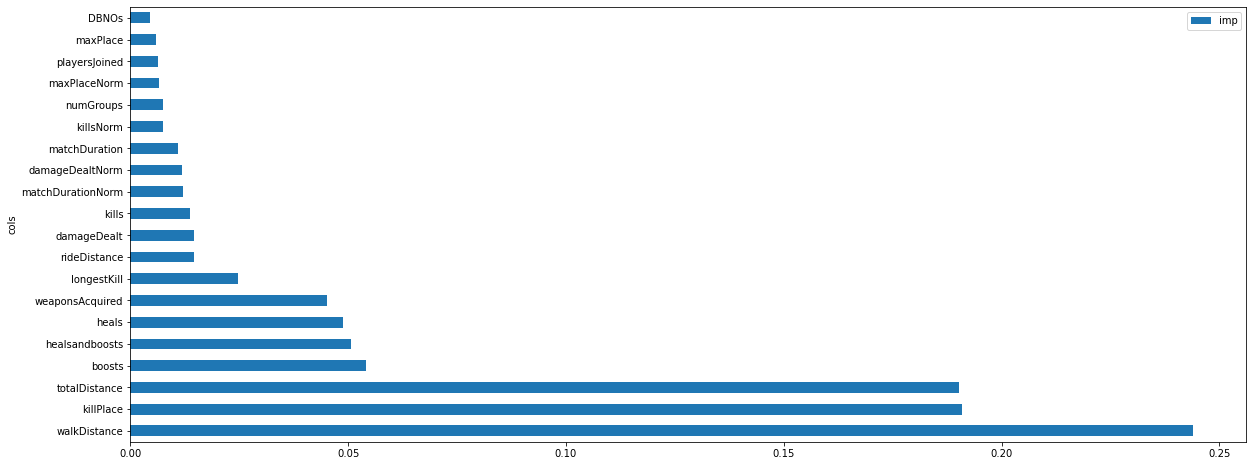

In [80]:
# 绘制特征重要性程度图，仅展示排名前二十的特征
imp_df[:20].plot('cols', 'imp', figsize=(20,8), kind = 'barh')
plt.show()

In [81]:
# 保留比较重要的特征
to_keep = imp_df[imp_df.imp>0.005].cols
print('Significant features: ', len(to_keep))
to_keep

Significant features:  19


21         walkDistance
6             killPlace
30        totalDistance
1                boosts
29       healsandboosts
5                 heals
22      weaponsAcquired
10          longestKill
16         rideDistance
2           damageDealt
8                 kills
28    matchDurationNorm
26      damageDealtNorm
11        matchDuration
25            killsNorm
13            numGroups
27         maxPlaceNorm
24        playersJoined
12             maxPlace
Name: cols, dtype: object

In [82]:
# 由这些比较重要的特征值，生成新的df
df[to_keep].head()

,walkDistance,killPlace,totalDistance,boosts,healsandboosts,heals,weaponsAcquired,longestKill,rideDistance,damageDealt,kills,matchDurationNorm,damageDealtNorm,matchDuration,killsNorm,numGroups,maxPlaceNorm,playersJoined,maxPlace
1699712,982.200,57,982.200,0,0,0,2,0.00,0.0,0.0,0,1380.75,0.000,1315,0.00,46,50.40,95,48
1056002,1968.000,28,2478.100,2,2,0,4,22.83,510.1,100.0,1,1458.44,101.000,1444,1.01,50,50.50,99,50
944511,1654.000,24,4552.000,5,17,12,5,200.70,2898.0,104.8,1,1841.10,106.896,1805,1.02,27,28.56,98,28
3387405,1756.000,29,2628.400,2,3,1,2,14.66,872.4,147.2,1,1505.90,161.920,1369,1.10,43,50.60,90,46
1798182,4.997,94,4.997,0,0,0,0,0.00,0.0,0.0,0,1245.42,0.000,1221,0.00,29,30.60,98,30


In [83]:
# 重新制定训练集和测试集
df_keep = df[to_keep]
X_train, X_valid, y_train, y_valid = train_test_split(df_keep, y, test_size=0.2)

In [84]:
X_train.shape

(800000, 19)

In [85]:
# 模型训练
m2 = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features='sqrt',
                          n_jobs=-1)
# n_jobs=-1 表示训练的时候，并行数和cpu的核数一样，如果传入具体的值，表示用几个核去跑

m2.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=3, n_estimators=40,
                      n_jobs=-1)

In [86]:
# 模型评分
y_pre = m2.predict(X_valid)
m2.score(X_valid, y_valid)

0.9252249235701538

In [87]:
# mae评估
mean_absolute_error(y_true=y_valid, y_pred=y_pre)

# 使用该种方法,最后得到的结果,反而更差,停止优化!

0.0594113189337898

# 使用lightGBM对模型进行训练

In [89]:
import lightgbm as lgb

# 创建模型，训练模型
gbm = lgb.LGBMRegressor(objective='regression', 
                        num_leaves=31, 
                        learning_rate=0.05, 
                        n_estimators=20)

gbm.fit(X_train, y_train, 
        eval_set=[(X_valid, y_valid)], 
        eval_metric='l1', 
        early_stopping_rounds=5)
# ps:最后几个参数必须一起使用.

[1]	valid_0's l1: 0.255994	valid_0's l2: 0.0865579
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 0.244898	valid_0's l2: 0.0794375
[3]	valid_0's l1: 0.234371	valid_0's l2: 0.0729912
[4]	valid_0's l1: 0.224459	valid_0's l2: 0.0671612
[5]	valid_0's l1: 0.215097	valid_0's l2: 0.0618916
[6]	valid_0's l1: 0.206284	valid_0's l2: 0.0571281
[7]	valid_0's l1: 0.197857	valid_0's l2: 0.0527579
[8]	valid_0's l1: 0.189954	valid_0's l2: 0.0488349
[9]	valid_0's l1: 0.182457	valid_0's l2: 0.0452501
[10]	valid_0's l1: 0.175386	valid_0's l2: 0.0420164
[11]	valid_0's l1: 0.168657	valid_0's l2: 0.0390548
[12]	valid_0's l1: 0.162348	valid_0's l2: 0.0363711
[13]	valid_0's l1: 0.156437	valid_0's l2: 0.0339602
[14]	valid_0's l1: 0.150867	valid_0's l2: 0.0317655
[15]	valid_0's l1: 0.145578	valid_0's l2: 0.0297621
[16]	valid_0's l1: 0.140663	valid_0's l2: 0.027951
[17]	valid_0's l1: 0.136003	valid_0's l2: 0.0262981
[18]	valid_0's l1: 0.131628	valid_0's l2: 0.0248056
[19]	valid_0's

LGBMRegressor(learning_rate=0.05, n_estimators=20, objective='regression')

In [90]:
# 测试机预测
y_pred = gbm.predict(X_valid, num_iteration=gbm.best_iteration_)
mean_absolute_error(y_valid, y_pred)

0.12362831399693566

# 模型二次调优

In [91]:
from sklearn.model_selection import GridSearchCV
# 网格搜索，参数优化
estimator = lgb.LGBMRegressor(num_leaves=31)
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [20, 40, 60, 100, 200, 300]
}
gbm = GridSearchCV(estimator, param_grid, cv=5, n_jobs=-1) # 此处原来有个警告,通过此添加,解决掉!!!
gbm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [20, 40, 60, 100, 200, 300]})

In [92]:
# 测试机预测
y_pred = gbm.predict(X_valid)
mean_absolute_error(y_valid, y_pred)

0.05640001118393417

In [93]:
print('交叉验证\网格搜索调试后,最好的参数模型是:', gbm.best_params_)

交叉验证\网格搜索调试后,最好的参数模型是: {'learning_rate': 0.1, 'n_estimators': 300}


# 模型三次调优[思路]

In [94]:
# n_estimators
scores = []
n_estimators = [100, 500, 1000]

for nes in n_estimators:
    lgbm = lgb.LGBMRegressor(boosting_type='gbdt', 
                      num_leaves=31,
                      max_depth=5,
                      learning_rate=0.1,
                      n_estimators=nes,
                      min_child_samples=20,
                      n_jobs=-1)
    
    lgbm.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], eval_metric='l1', early_stopping_rounds=5)
    y_pre = lgbm.predict(X_valid)
    mae = mean_absolute_error(y_valid, y_pre)
    scores.append(mae)
    print("test data mae eval : {}".format(mae))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's l1: 0.24469	valid_0's l2: 0.0793098
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 0.224227	valid_0's l2: 0.0670097
[3]	valid_0's l1: 0.205913	valid_0's l2: 0.0569528
[4]	valid_0's l1: 0.189786	valid_0's l2: 0.0488105
[5]	valid_0's l1: 0.175449	valid_0's l2: 0.0421608
[6]	valid_0's l1: 0.162768	valid_0's l2: 0.0366499
[7]	valid_0's l1: 0.151332	valid_0's l2: 0.0321114
[8]	valid_0's l1: 0.14152	valid_0's l2: 0.0284489
[9]	valid_0's l1: 0.132634	valid_0's l2: 0.025388
[10]	valid_0's l1: 0.124915	valid_0's l2: 0.0228742
[11]	valid_0's l1: 0.117644	valid_0's l2: 0.0206205
[12]	valid_0's l1: 0.111767	valid_0's l2: 0.0189378
[13]	valid_0's l1: 0.106419	valid_0's l2: 0.0175009
[14]	valid_0's l1: 0.101329	valid_0's l2: 0.0161625
[15]	valid_0's l1: 0.0968095	valid_0's l2: 0.0150106
[16]	valid_0's l1: 0.092614	valid_0's l2:

[46]	valid_0's l1: 0.062936	valid_0's l2: 0.00785446
[47]	valid_0's l1: 0.0627369	valid_0's l2: 0.00781257
[48]	valid_0's l1: 0.062575	valid_0's l2: 0.00777938
[49]	valid_0's l1: 0.0624596	valid_0's l2: 0.00775046
[50]	valid_0's l1: 0.0622996	valid_0's l2: 0.00771487
[51]	valid_0's l1: 0.062157	valid_0's l2: 0.0076892
[52]	valid_0's l1: 0.0620693	valid_0's l2: 0.00767307
[53]	valid_0's l1: 0.0619578	valid_0's l2: 0.00764857
[54]	valid_0's l1: 0.0618539	valid_0's l2: 0.00762454
[55]	valid_0's l1: 0.0617354	valid_0's l2: 0.00759194
[56]	valid_0's l1: 0.0616364	valid_0's l2: 0.00756874
[57]	valid_0's l1: 0.0614565	valid_0's l2: 0.0075122
[58]	valid_0's l1: 0.0613413	valid_0's l2: 0.00748311
[59]	valid_0's l1: 0.0612042	valid_0's l2: 0.00744067
[60]	valid_0's l1: 0.0611061	valid_0's l2: 0.0074169
[61]	valid_0's l1: 0.0610169	valid_0's l2: 0.00739607
[62]	valid_0's l1: 0.0608693	valid_0's l2: 0.00735526
[63]	valid_0's l1: 0.0607464	valid_0's l2: 0.00732422
[64]	valid_0's l1: 0.060707	valid_

[200]	valid_0's l1: 0.0573509	valid_0's l2: 0.00644368
[201]	valid_0's l1: 0.0573448	valid_0's l2: 0.00644243
[202]	valid_0's l1: 0.0573433	valid_0's l2: 0.00644185
[203]	valid_0's l1: 0.0573287	valid_0's l2: 0.00643846
[204]	valid_0's l1: 0.0573235	valid_0's l2: 0.00643668
[205]	valid_0's l1: 0.0573161	valid_0's l2: 0.00643553
[206]	valid_0's l1: 0.0573106	valid_0's l2: 0.00643473
[207]	valid_0's l1: 0.0573092	valid_0's l2: 0.00643437
[208]	valid_0's l1: 0.0572996	valid_0's l2: 0.00643248
[209]	valid_0's l1: 0.0572869	valid_0's l2: 0.00643044
[210]	valid_0's l1: 0.0572802	valid_0's l2: 0.00642962
[211]	valid_0's l1: 0.0572676	valid_0's l2: 0.00642547
[212]	valid_0's l1: 0.0572545	valid_0's l2: 0.00642263
[213]	valid_0's l1: 0.0572521	valid_0's l2: 0.00642164
[214]	valid_0's l1: 0.0572486	valid_0's l2: 0.0064209
[215]	valid_0's l1: 0.057235	valid_0's l2: 0.00641737
[216]	valid_0's l1: 0.0572316	valid_0's l2: 0.00641624
[217]	valid_0's l1: 0.057215	valid_0's l2: 0.00641304
[218]	valid_0

[350]	valid_0's l1: 0.056586	valid_0's l2: 0.00628359
[351]	valid_0's l1: 0.0565838	valid_0's l2: 0.00628313
[352]	valid_0's l1: 0.0565786	valid_0's l2: 0.0062821
[353]	valid_0's l1: 0.0565752	valid_0's l2: 0.00628163
[354]	valid_0's l1: 0.0565716	valid_0's l2: 0.00628086
[355]	valid_0's l1: 0.0565631	valid_0's l2: 0.0062792
[356]	valid_0's l1: 0.0565603	valid_0's l2: 0.0062787
[357]	valid_0's l1: 0.0565582	valid_0's l2: 0.00627808
[358]	valid_0's l1: 0.0565569	valid_0's l2: 0.00627776
[359]	valid_0's l1: 0.0565539	valid_0's l2: 0.00627724
[360]	valid_0's l1: 0.056547	valid_0's l2: 0.00627581
[361]	valid_0's l1: 0.0565451	valid_0's l2: 0.00627528
[362]	valid_0's l1: 0.0565438	valid_0's l2: 0.00627482
[363]	valid_0's l1: 0.056543	valid_0's l2: 0.00627469
[364]	valid_0's l1: 0.0565429	valid_0's l2: 0.00627487
[365]	valid_0's l1: 0.0565357	valid_0's l2: 0.00627422
[366]	valid_0's l1: 0.0565361	valid_0's l2: 0.00627454
[367]	valid_0's l1: 0.0565332	valid_0's l2: 0.00627396
[368]	valid_0's 

[499]	valid_0's l1: 0.056276	valid_0's l2: 0.00622421
[500]	valid_0's l1: 0.0562736	valid_0's l2: 0.00622385
Did not meet early stopping. Best iteration is:
[500]	valid_0's l1: 0.0562736	valid_0's l2: 0.00622385
test data mae eval : 0.056273570913106134
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's l1: 0.24469	valid_0's l2: 0.0793098
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 0.224227	valid_0's l2: 0.0670097
[3]	valid_0's l1: 0.205913	valid_0's l2: 0.0569528
[4]	valid_0's l1: 0.189786	valid_0's l2: 0.0488105
[5]	valid_0's l1: 0.175449	valid_0's l2: 0.0421608
[6]	valid_0's l1: 0.162768	valid_0's l2: 0.0366499
[7]	valid_0's l1: 0.151332	valid_0's l2: 0.0321114
[8]	valid_0's l1: 0.14152	valid_0's l2: 0.0284489
[9]	valid_0's l1: 0.132634	valid_0's l2: 0.025388
[10]	valid_0's l1: 0.124915	valid_0's l2: 0.0228742
[11]	valid_0's l1: 0.117644	valid_0's l2: 0.0206

[148]	valid_0's l1: 0.0578899	valid_0's l2: 0.00656645
[149]	valid_0's l1: 0.0578762	valid_0's l2: 0.00656345
[150]	valid_0's l1: 0.0578629	valid_0's l2: 0.00656117
[151]	valid_0's l1: 0.05783	valid_0's l2: 0.00655443
[152]	valid_0's l1: 0.0578221	valid_0's l2: 0.00655187
[153]	valid_0's l1: 0.0578055	valid_0's l2: 0.00654769
[154]	valid_0's l1: 0.0577993	valid_0's l2: 0.00654624
[155]	valid_0's l1: 0.0577898	valid_0's l2: 0.00654475
[156]	valid_0's l1: 0.0577772	valid_0's l2: 0.00654237
[157]	valid_0's l1: 0.0577736	valid_0's l2: 0.00654181
[158]	valid_0's l1: 0.0577447	valid_0's l2: 0.00653604
[159]	valid_0's l1: 0.0577321	valid_0's l2: 0.00653283
[160]	valid_0's l1: 0.0577137	valid_0's l2: 0.00652826
[161]	valid_0's l1: 0.0576998	valid_0's l2: 0.00652617
[162]	valid_0's l1: 0.0576897	valid_0's l2: 0.00652277
[163]	valid_0's l1: 0.0576883	valid_0's l2: 0.00652181
[164]	valid_0's l1: 0.0576828	valid_0's l2: 0.00652076
[165]	valid_0's l1: 0.057661	valid_0's l2: 0.00651629
[166]	valid_0

[302]	valid_0's l1: 0.0567576	valid_0's l2: 0.00631569
[303]	valid_0's l1: 0.0567542	valid_0's l2: 0.00631548
[304]	valid_0's l1: 0.056749	valid_0's l2: 0.00631471
[305]	valid_0's l1: 0.0567442	valid_0's l2: 0.0063135
[306]	valid_0's l1: 0.0567425	valid_0's l2: 0.00631306
[307]	valid_0's l1: 0.0567424	valid_0's l2: 0.00631313
[308]	valid_0's l1: 0.0567408	valid_0's l2: 0.00631306
[309]	valid_0's l1: 0.0567394	valid_0's l2: 0.00631294
[310]	valid_0's l1: 0.0567374	valid_0's l2: 0.00631233
[311]	valid_0's l1: 0.0567325	valid_0's l2: 0.00631144
[312]	valid_0's l1: 0.0567311	valid_0's l2: 0.00631144
[313]	valid_0's l1: 0.0567295	valid_0's l2: 0.00631103
[314]	valid_0's l1: 0.0567217	valid_0's l2: 0.00630944
[315]	valid_0's l1: 0.0567206	valid_0's l2: 0.00630938
[316]	valid_0's l1: 0.0567187	valid_0's l2: 0.00630895
[317]	valid_0's l1: 0.0567134	valid_0's l2: 0.00630898
[318]	valid_0's l1: 0.0567092	valid_0's l2: 0.00630802
[319]	valid_0's l1: 0.0567073	valid_0's l2: 0.00630719
[320]	valid_

[455]	valid_0's l1: 0.0563496	valid_0's l2: 0.00623713
[456]	valid_0's l1: 0.0563493	valid_0's l2: 0.00623734
[457]	valid_0's l1: 0.0563464	valid_0's l2: 0.00623674
[458]	valid_0's l1: 0.0563438	valid_0's l2: 0.0062361
[459]	valid_0's l1: 0.0563429	valid_0's l2: 0.00623588
[460]	valid_0's l1: 0.0563364	valid_0's l2: 0.00623442
[461]	valid_0's l1: 0.0563361	valid_0's l2: 0.00623417
[462]	valid_0's l1: 0.0563342	valid_0's l2: 0.00623386
[463]	valid_0's l1: 0.0563331	valid_0's l2: 0.00623362
[464]	valid_0's l1: 0.0563323	valid_0's l2: 0.00623361
[465]	valid_0's l1: 0.0563323	valid_0's l2: 0.00623361
[466]	valid_0's l1: 0.0563293	valid_0's l2: 0.00623333
[467]	valid_0's l1: 0.0563267	valid_0's l2: 0.006233
[468]	valid_0's l1: 0.0563261	valid_0's l2: 0.00623288
[469]	valid_0's l1: 0.0563248	valid_0's l2: 0.00623281
[470]	valid_0's l1: 0.0563247	valid_0's l2: 0.00623306
[471]	valid_0's l1: 0.0563201	valid_0's l2: 0.00623193
[472]	valid_0's l1: 0.0563177	valid_0's l2: 0.00623157
[473]	valid_0

[608]	valid_0's l1: 0.0561236	valid_0's l2: 0.0061983
[609]	valid_0's l1: 0.056123	valid_0's l2: 0.00619825
[610]	valid_0's l1: 0.0561206	valid_0's l2: 0.00619804
[611]	valid_0's l1: 0.0561192	valid_0's l2: 0.00619769
[612]	valid_0's l1: 0.0561178	valid_0's l2: 0.00619749
[613]	valid_0's l1: 0.0561181	valid_0's l2: 0.00619733
[614]	valid_0's l1: 0.0561158	valid_0's l2: 0.00619704
[615]	valid_0's l1: 0.0561154	valid_0's l2: 0.00619698
[616]	valid_0's l1: 0.0561147	valid_0's l2: 0.00619668
[617]	valid_0's l1: 0.0561127	valid_0's l2: 0.00619628
[618]	valid_0's l1: 0.0561124	valid_0's l2: 0.00619593
[619]	valid_0's l1: 0.0561098	valid_0's l2: 0.00619549
[620]	valid_0's l1: 0.0561085	valid_0's l2: 0.00619522
[621]	valid_0's l1: 0.056107	valid_0's l2: 0.0061947
[622]	valid_0's l1: 0.0561073	valid_0's l2: 0.00619503
[623]	valid_0's l1: 0.0561074	valid_0's l2: 0.00619496
[624]	valid_0's l1: 0.0561068	valid_0's l2: 0.00619494
[625]	valid_0's l1: 0.0561036	valid_0's l2: 0.00619438
[626]	valid_0'

best n_estimator 1000


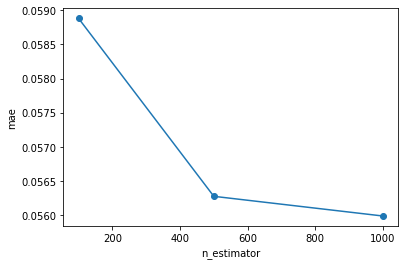

In [95]:
plt.plot(n_estimators,scores,'o-')
plt.ylabel("mae")
plt.xlabel("n_estimator")
print("best n_estimator {}".format(n_estimators[np.argmin(scores)]))

In [96]:
# max_depths
scores = []
max_depths = [1, 5, 7, 9]

for nes in max_depths:
    lgbm = lgb.LGBMRegressor(boosting_type='gbdt', 
                      num_leaves=31,
                      max_depth=nes,
                      learning_rate=0.1,
                      n_estimators=1000,
                      min_child_samples=20,
                      n_jobs=-1)
    lgbm.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], eval_metric='l1', early_stopping_rounds=5)
    y_pre = lgbm.predict(X_valid)
    mae = mean_absolute_error(y_valid, y_pre)
    scores.append(mae)
    print("test data mae eval : {}".format(mae))

[1]	valid_0's l1: 0.250047	valid_0's l2: 0.0835523
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 0.234931	valid_0's l2: 0.0746576
[3]	valid_0's l1: 0.221918	valid_0's l2: 0.0672602
[4]	valid_0's l1: 0.21055	valid_0's l2: 0.0611047
[5]	valid_0's l1: 0.200785	valid_0's l2: 0.0559424
[6]	valid_0's l1: 0.191611	valid_0's l2: 0.0514242
[7]	valid_0's l1: 0.183673	valid_0's l2: 0.0475648
[8]	valid_0's l1: 0.17658	valid_0's l2: 0.0441956
[9]	valid_0's l1: 0.169834	valid_0's l2: 0.0412217
[10]	valid_0's l1: 0.164092	valid_0's l2: 0.0387034
[11]	valid_0's l1: 0.158709	valid_0's l2: 0.0364905
[12]	valid_0's l1: 0.153934	valid_0's l2: 0.034506
[13]	valid_0's l1: 0.1496	valid_0's l2: 0.0327695
[14]	valid_0's l1: 0.145503	valid_0's l2: 0.0312422
[15]	valid_0's l1: 0.142052	valid_0's l2: 0.0298963
[16]	valid_0's l1: 0.138499	valid_0's l2: 0.0286854
[17]	valid_0's l1: 0.135565	valid_0's l2: 0.0275984
[18]	valid_0's l1: 0.132871	valid_0's l2: 0.0266569
[19]	valid_0's l1:

[161]	valid_0's l1: 0.0881115	valid_0's l2: 0.0147074
[162]	valid_0's l1: 0.0881079	valid_0's l2: 0.014696
[163]	valid_0's l1: 0.0880366	valid_0's l2: 0.0146836
[164]	valid_0's l1: 0.0880338	valid_0's l2: 0.0146727
[165]	valid_0's l1: 0.0879789	valid_0's l2: 0.0146612
[166]	valid_0's l1: 0.0879152	valid_0's l2: 0.01465
[167]	valid_0's l1: 0.087912	valid_0's l2: 0.0146391
[168]	valid_0's l1: 0.0878447	valid_0's l2: 0.0146276
[169]	valid_0's l1: 0.0878238	valid_0's l2: 0.0146167
[170]	valid_0's l1: 0.0878214	valid_0's l2: 0.0146063
[171]	valid_0's l1: 0.0877686	valid_0's l2: 0.0145952
[172]	valid_0's l1: 0.0877668	valid_0's l2: 0.0145851
[173]	valid_0's l1: 0.0877	valid_0's l2: 0.0145737
[174]	valid_0's l1: 0.0876824	valid_0's l2: 0.0145637
[175]	valid_0's l1: 0.0876344	valid_0's l2: 0.0145536
[176]	valid_0's l1: 0.0875677	valid_0's l2: 0.0145434
[177]	valid_0's l1: 0.0875651	valid_0's l2: 0.0145332
[178]	valid_0's l1: 0.0875146	valid_0's l2: 0.0145229
[179]	valid_0's l1: 0.0874686	valid

[319]	valid_0's l1: 0.0843266	valid_0's l2: 0.0135631
[320]	valid_0's l1: 0.0843006	valid_0's l2: 0.0135581
[321]	valid_0's l1: 0.0843026	valid_0's l2: 0.0135534
[322]	valid_0's l1: 0.084267	valid_0's l2: 0.0135481
[323]	valid_0's l1: 0.0842691	valid_0's l2: 0.013543
[324]	valid_0's l1: 0.0842392	valid_0's l2: 0.0135382
[325]	valid_0's l1: 0.0842252	valid_0's l2: 0.0135337
[326]	valid_0's l1: 0.0842281	valid_0's l2: 0.0135293
[327]	valid_0's l1: 0.0842009	valid_0's l2: 0.0135241
[328]	valid_0's l1: 0.08418	valid_0's l2: 0.0135194
[329]	valid_0's l1: 0.0841402	valid_0's l2: 0.0135149
[330]	valid_0's l1: 0.0841426	valid_0's l2: 0.0135104
[331]	valid_0's l1: 0.0841069	valid_0's l2: 0.0135051
[332]	valid_0's l1: 0.0841093	valid_0's l2: 0.0135003
[333]	valid_0's l1: 0.0840741	valid_0's l2: 0.0134955
[334]	valid_0's l1: 0.0840773	valid_0's l2: 0.0134912
[335]	valid_0's l1: 0.0840564	valid_0's l2: 0.0134862
[336]	valid_0's l1: 0.0840416	valid_0's l2: 0.0134815
[337]	valid_0's l1: 0.0840442	va

[472]	valid_0's l1: 0.0822946	valid_0's l2: 0.0129219
[473]	valid_0's l1: 0.0822782	valid_0's l2: 0.0129182
[474]	valid_0's l1: 0.082282	valid_0's l2: 0.0129149
[475]	valid_0's l1: 0.0822532	valid_0's l2: 0.012911
[476]	valid_0's l1: 0.0822552	valid_0's l2: 0.0129074
[477]	valid_0's l1: 0.0822304	valid_0's l2: 0.0129039
[478]	valid_0's l1: 0.0822346	valid_0's l2: 0.0129005
[479]	valid_0's l1: 0.0822056	valid_0's l2: 0.0128966
[480]	valid_0's l1: 0.0822096	valid_0's l2: 0.0128933
[481]	valid_0's l1: 0.0821901	valid_0's l2: 0.0128894
[482]	valid_0's l1: 0.0821708	valid_0's l2: 0.0128863
[483]	valid_0's l1: 0.0821404	valid_0's l2: 0.0128829
[484]	valid_0's l1: 0.0821443	valid_0's l2: 0.0128796
[485]	valid_0's l1: 0.0821159	valid_0's l2: 0.0128759
[486]	valid_0's l1: 0.0821205	valid_0's l2: 0.0128725
[487]	valid_0's l1: 0.0820928	valid_0's l2: 0.012869
[488]	valid_0's l1: 0.0820966	valid_0's l2: 0.0128653
[489]	valid_0's l1: 0.0820813	valid_0's l2: 0.0128617
[490]	valid_0's l1: 0.0820849	v

[628]	valid_0's l1: 0.0807098	valid_0's l2: 0.0124224
[629]	valid_0's l1: 0.0807196	valid_0's l2: 0.0124197
[630]	valid_0's l1: 0.0807241	valid_0's l2: 0.0124171
[631]	valid_0's l1: 0.0807	valid_0's l2: 0.0124139
[632]	valid_0's l1: 0.0807038	valid_0's l2: 0.0124113
[633]	valid_0's l1: 0.080691	valid_0's l2: 0.0124083
[634]	valid_0's l1: 0.0806752	valid_0's l2: 0.0124057
[635]	valid_0's l1: 0.0806701	valid_0's l2: 0.0124034
[636]	valid_0's l1: 0.0806474	valid_0's l2: 0.0124005
[637]	valid_0's l1: 0.0806515	valid_0's l2: 0.0123977
[638]	valid_0's l1: 0.0806536	valid_0's l2: 0.012395
[639]	valid_0's l1: 0.0806302	valid_0's l2: 0.0123919
[640]	valid_0's l1: 0.0806342	valid_0's l2: 0.0123893
[641]	valid_0's l1: 0.080616	valid_0's l2: 0.0123864
[642]	valid_0's l1: 0.0806199	valid_0's l2: 0.0123838
[643]	valid_0's l1: 0.0805957	valid_0's l2: 0.0123808
[644]	valid_0's l1: 0.0805864	valid_0's l2: 0.0123781
[645]	valid_0's l1: 0.0805904	valid_0's l2: 0.0123756
[646]	valid_0's l1: 0.0805669	vali

[781]	valid_0's l1: 0.0795037	valid_0's l2: 0.0120375
[782]	valid_0's l1: 0.0794927	valid_0's l2: 0.0120353
[783]	valid_0's l1: 0.0794969	valid_0's l2: 0.0120331
[784]	valid_0's l1: 0.0794767	valid_0's l2: 0.0120306
[785]	valid_0's l1: 0.0794815	valid_0's l2: 0.0120285
[786]	valid_0's l1: 0.0794609	valid_0's l2: 0.0120261
[787]	valid_0's l1: 0.0794508	valid_0's l2: 0.0120237
[788]	valid_0's l1: 0.079447	valid_0's l2: 0.0120209
[789]	valid_0's l1: 0.0794518	valid_0's l2: 0.0120188
[790]	valid_0's l1: 0.0794313	valid_0's l2: 0.0120164
[791]	valid_0's l1: 0.079418	valid_0's l2: 0.0120142
[792]	valid_0's l1: 0.0794225	valid_0's l2: 0.0120122
[793]	valid_0's l1: 0.0794057	valid_0's l2: 0.0120098
[794]	valid_0's l1: 0.0794106	valid_0's l2: 0.0120077
[795]	valid_0's l1: 0.0793909	valid_0's l2: 0.0120054
[796]	valid_0's l1: 0.0793951	valid_0's l2: 0.0120031
[797]	valid_0's l1: 0.0793848	valid_0's l2: 0.0120009
[798]	valid_0's l1: 0.0793892	valid_0's l2: 0.0119989
[799]	valid_0's l1: 0.0793686	

[936]	valid_0's l1: 0.0784982	valid_0's l2: 0.011721
[937]	valid_0's l1: 0.0785029	valid_0's l2: 0.0117193
[938]	valid_0's l1: 0.0784852	valid_0's l2: 0.0117173
[939]	valid_0's l1: 0.0784908	valid_0's l2: 0.0117156
[940]	valid_0's l1: 0.0784846	valid_0's l2: 0.0117141
[941]	valid_0's l1: 0.0784728	valid_0's l2: 0.0117123
[942]	valid_0's l1: 0.078477	valid_0's l2: 0.0117105
[943]	valid_0's l1: 0.0784605	valid_0's l2: 0.0117085
[944]	valid_0's l1: 0.0784651	valid_0's l2: 0.0117068
[945]	valid_0's l1: 0.0784472	valid_0's l2: 0.0117048
[946]	valid_0's l1: 0.0784516	valid_0's l2: 0.0117031
[947]	valid_0's l1: 0.0784369	valid_0's l2: 0.0117012
[948]	valid_0's l1: 0.0784412	valid_0's l2: 0.0116995
[949]	valid_0's l1: 0.0784233	valid_0's l2: 0.0116975
[950]	valid_0's l1: 0.0784141	valid_0's l2: 0.0116955
[951]	valid_0's l1: 0.0784166	valid_0's l2: 0.0116937
[952]	valid_0's l1: 0.0784028	valid_0's l2: 0.0116921
[953]	valid_0's l1: 0.0784071	valid_0's l2: 0.0116904
[954]	valid_0's l1: 0.0783896	

[86]	valid_0's l1: 0.0595269	valid_0's l2: 0.00700028
[87]	valid_0's l1: 0.0595096	valid_0's l2: 0.00699516
[88]	valid_0's l1: 0.0594833	valid_0's l2: 0.00699083
[89]	valid_0's l1: 0.0594288	valid_0's l2: 0.00697475
[90]	valid_0's l1: 0.059394	valid_0's l2: 0.00696581
[91]	valid_0's l1: 0.0593693	valid_0's l2: 0.00695874
[92]	valid_0's l1: 0.0593219	valid_0's l2: 0.00694712
[93]	valid_0's l1: 0.0592949	valid_0's l2: 0.00693999
[94]	valid_0's l1: 0.0592389	valid_0's l2: 0.00692331
[95]	valid_0's l1: 0.0592022	valid_0's l2: 0.00691336
[96]	valid_0's l1: 0.0591481	valid_0's l2: 0.00690208
[97]	valid_0's l1: 0.0590795	valid_0's l2: 0.00688311
[98]	valid_0's l1: 0.0590225	valid_0's l2: 0.00686194
[99]	valid_0's l1: 0.0589597	valid_0's l2: 0.00684735
[100]	valid_0's l1: 0.0588836	valid_0's l2: 0.00682686
[101]	valid_0's l1: 0.0588363	valid_0's l2: 0.00681081
[102]	valid_0's l1: 0.0588169	valid_0's l2: 0.00680437
[103]	valid_0's l1: 0.0587915	valid_0's l2: 0.00679914
[104]	valid_0's l1: 0.058

[237]	valid_0's l1: 0.057026	valid_0's l2: 0.00637259
[238]	valid_0's l1: 0.0570181	valid_0's l2: 0.00637032
[239]	valid_0's l1: 0.0570185	valid_0's l2: 0.0063703
[240]	valid_0's l1: 0.0570126	valid_0's l2: 0.00636852
[241]	valid_0's l1: 0.0570106	valid_0's l2: 0.00636779
[242]	valid_0's l1: 0.0570055	valid_0's l2: 0.00636672
[243]	valid_0's l1: 0.0570052	valid_0's l2: 0.00636623
[244]	valid_0's l1: 0.0570014	valid_0's l2: 0.00636498
[245]	valid_0's l1: 0.0569905	valid_0's l2: 0.00636444
[246]	valid_0's l1: 0.0569895	valid_0's l2: 0.00636435
[247]	valid_0's l1: 0.0569861	valid_0's l2: 0.00636404
[248]	valid_0's l1: 0.0569813	valid_0's l2: 0.00636331
[249]	valid_0's l1: 0.0569772	valid_0's l2: 0.00636243
[250]	valid_0's l1: 0.0569702	valid_0's l2: 0.00636101
[251]	valid_0's l1: 0.056965	valid_0's l2: 0.00636061
[252]	valid_0's l1: 0.0569632	valid_0's l2: 0.0063601
[253]	valid_0's l1: 0.0569603	valid_0's l2: 0.00635946
[254]	valid_0's l1: 0.056959	valid_0's l2: 0.00635933
[255]	valid_0's

[387]	valid_0's l1: 0.0564858	valid_0's l2: 0.00626592
[388]	valid_0's l1: 0.0564839	valid_0's l2: 0.00626573
[389]	valid_0's l1: 0.0564812	valid_0's l2: 0.00626526
[390]	valid_0's l1: 0.0564781	valid_0's l2: 0.00626464
[391]	valid_0's l1: 0.0564749	valid_0's l2: 0.00626397
[392]	valid_0's l1: 0.0564734	valid_0's l2: 0.00626363
[393]	valid_0's l1: 0.0564674	valid_0's l2: 0.0062623
[394]	valid_0's l1: 0.0564666	valid_0's l2: 0.00626184
[395]	valid_0's l1: 0.0564636	valid_0's l2: 0.00626151
[396]	valid_0's l1: 0.0564631	valid_0's l2: 0.00626129
[397]	valid_0's l1: 0.0564591	valid_0's l2: 0.00626032
[398]	valid_0's l1: 0.056459	valid_0's l2: 0.00626071
[399]	valid_0's l1: 0.0564588	valid_0's l2: 0.00626021
[400]	valid_0's l1: 0.0564581	valid_0's l2: 0.0062602
[401]	valid_0's l1: 0.0564548	valid_0's l2: 0.00625932
[402]	valid_0's l1: 0.0564536	valid_0's l2: 0.00625914
[403]	valid_0's l1: 0.0564511	valid_0's l2: 0.00625861
[404]	valid_0's l1: 0.0564496	valid_0's l2: 0.00625803
[405]	valid_0

[537]	valid_0's l1: 0.0562278	valid_0's l2: 0.00621455
[538]	valid_0's l1: 0.0562251	valid_0's l2: 0.00621404
[539]	valid_0's l1: 0.056224	valid_0's l2: 0.00621389
[540]	valid_0's l1: 0.0562234	valid_0's l2: 0.00621367
[541]	valid_0's l1: 0.0562203	valid_0's l2: 0.00621341
[542]	valid_0's l1: 0.0562171	valid_0's l2: 0.00621276
[543]	valid_0's l1: 0.0562166	valid_0's l2: 0.00621279
[544]	valid_0's l1: 0.0562164	valid_0's l2: 0.00621285
[545]	valid_0's l1: 0.0562162	valid_0's l2: 0.00621279
[546]	valid_0's l1: 0.0562134	valid_0's l2: 0.00621217
[547]	valid_0's l1: 0.0562107	valid_0's l2: 0.00621169
[548]	valid_0's l1: 0.0562111	valid_0's l2: 0.00621196
[549]	valid_0's l1: 0.0562103	valid_0's l2: 0.00621173
[550]	valid_0's l1: 0.0562073	valid_0's l2: 0.00621118
[551]	valid_0's l1: 0.0562071	valid_0's l2: 0.00621127
[552]	valid_0's l1: 0.056207	valid_0's l2: 0.00621125
[553]	valid_0's l1: 0.0562068	valid_0's l2: 0.00621135
[554]	valid_0's l1: 0.0562064	valid_0's l2: 0.00621118
[555]	valid_

[689]	valid_0's l1: 0.0560293	valid_0's l2: 0.00618136
[690]	valid_0's l1: 0.0560282	valid_0's l2: 0.00618117
[691]	valid_0's l1: 0.0560273	valid_0's l2: 0.00618091
[692]	valid_0's l1: 0.056026	valid_0's l2: 0.00618027
[693]	valid_0's l1: 0.0560228	valid_0's l2: 0.00617976
[694]	valid_0's l1: 0.0560216	valid_0's l2: 0.0061795
[695]	valid_0's l1: 0.0560213	valid_0's l2: 0.00617942
[696]	valid_0's l1: 0.0560203	valid_0's l2: 0.0061793
[697]	valid_0's l1: 0.0560178	valid_0's l2: 0.00617883
[698]	valid_0's l1: 0.0560178	valid_0's l2: 0.0061789
[699]	valid_0's l1: 0.0560175	valid_0's l2: 0.00617899
[700]	valid_0's l1: 0.0560159	valid_0's l2: 0.00617878
[701]	valid_0's l1: 0.0560164	valid_0's l2: 0.00617871
[702]	valid_0's l1: 0.0560154	valid_0's l2: 0.00617841
[703]	valid_0's l1: 0.0560148	valid_0's l2: 0.00617838
[704]	valid_0's l1: 0.0560142	valid_0's l2: 0.00617822
[705]	valid_0's l1: 0.0560139	valid_0's l2: 0.00617818
[706]	valid_0's l1: 0.0560137	valid_0's l2: 0.00617812
[707]	valid_0'

[95]	valid_0's l1: 0.0583965	valid_0's l2: 0.00664736
[96]	valid_0's l1: 0.058376	valid_0's l2: 0.00664316
[97]	valid_0's l1: 0.0583521	valid_0's l2: 0.00663804
[98]	valid_0's l1: 0.0583214	valid_0's l2: 0.0066313
[99]	valid_0's l1: 0.0583161	valid_0's l2: 0.00662853
[100]	valid_0's l1: 0.0582833	valid_0's l2: 0.00662038
[101]	valid_0's l1: 0.0582526	valid_0's l2: 0.0066133
[102]	valid_0's l1: 0.0582352	valid_0's l2: 0.00660997
[103]	valid_0's l1: 0.0581965	valid_0's l2: 0.00660007
[104]	valid_0's l1: 0.0581852	valid_0's l2: 0.00659737
[105]	valid_0's l1: 0.0581705	valid_0's l2: 0.00659454
[106]	valid_0's l1: 0.0581303	valid_0's l2: 0.00658536
[107]	valid_0's l1: 0.0581179	valid_0's l2: 0.00658286
[108]	valid_0's l1: 0.058093	valid_0's l2: 0.006577
[109]	valid_0's l1: 0.0580783	valid_0's l2: 0.00657406
[110]	valid_0's l1: 0.0580423	valid_0's l2: 0.00656548
[111]	valid_0's l1: 0.0580127	valid_0's l2: 0.00655871
[112]	valid_0's l1: 0.0579988	valid_0's l2: 0.00655616
[113]	valid_0's l1: 0

[246]	valid_0's l1: 0.0567231	valid_0's l2: 0.00629428
[247]	valid_0's l1: 0.0567207	valid_0's l2: 0.00629379
[248]	valid_0's l1: 0.056715	valid_0's l2: 0.00629284
[249]	valid_0's l1: 0.0567136	valid_0's l2: 0.00629284
[250]	valid_0's l1: 0.0567081	valid_0's l2: 0.00629137
[251]	valid_0's l1: 0.0567029	valid_0's l2: 0.00629024
[252]	valid_0's l1: 0.0566889	valid_0's l2: 0.00628815
[253]	valid_0's l1: 0.0566799	valid_0's l2: 0.00628623
[254]	valid_0's l1: 0.0566799	valid_0's l2: 0.00628651
[255]	valid_0's l1: 0.0566756	valid_0's l2: 0.00628539
[256]	valid_0's l1: 0.0566744	valid_0's l2: 0.00628507
[257]	valid_0's l1: 0.0566708	valid_0's l2: 0.00628464
[258]	valid_0's l1: 0.0566679	valid_0's l2: 0.00628402
[259]	valid_0's l1: 0.056665	valid_0's l2: 0.0062833
[260]	valid_0's l1: 0.0566599	valid_0's l2: 0.00628241
[261]	valid_0's l1: 0.0566595	valid_0's l2: 0.00628193
[262]	valid_0's l1: 0.0566552	valid_0's l2: 0.00628118
[263]	valid_0's l1: 0.0566455	valid_0's l2: 0.00627907
[264]	valid_0

[397]	valid_0's l1: 0.0562291	valid_0's l2: 0.00620936
[398]	valid_0's l1: 0.0562268	valid_0's l2: 0.00620904
[399]	valid_0's l1: 0.0562245	valid_0's l2: 0.00620858
[400]	valid_0's l1: 0.0562219	valid_0's l2: 0.00620816
[401]	valid_0's l1: 0.0562159	valid_0's l2: 0.00620729
[402]	valid_0's l1: 0.0562151	valid_0's l2: 0.00620716
[403]	valid_0's l1: 0.0562113	valid_0's l2: 0.00620616
[404]	valid_0's l1: 0.0562098	valid_0's l2: 0.00620593
[405]	valid_0's l1: 0.0562095	valid_0's l2: 0.00620593
[406]	valid_0's l1: 0.0562068	valid_0's l2: 0.00620539
[407]	valid_0's l1: 0.0562042	valid_0's l2: 0.00620478
[408]	valid_0's l1: 0.0562024	valid_0's l2: 0.00620441
[409]	valid_0's l1: 0.0562001	valid_0's l2: 0.00620416
[410]	valid_0's l1: 0.0561986	valid_0's l2: 0.00620388
[411]	valid_0's l1: 0.0561969	valid_0's l2: 0.00620373
[412]	valid_0's l1: 0.0561968	valid_0's l2: 0.00620397
[413]	valid_0's l1: 0.0561954	valid_0's l2: 0.00620366
[414]	valid_0's l1: 0.0561954	valid_0's l2: 0.00620368
[415]	vali

[74]	valid_0's l1: 0.0590923	valid_0's l2: 0.00678896
[75]	valid_0's l1: 0.0590159	valid_0's l2: 0.0067698
[76]	valid_0's l1: 0.0589644	valid_0's l2: 0.00675679
[77]	valid_0's l1: 0.0589143	valid_0's l2: 0.00674749
[78]	valid_0's l1: 0.0588662	valid_0's l2: 0.00673365
[79]	valid_0's l1: 0.058823	valid_0's l2: 0.00672659
[80]	valid_0's l1: 0.0587843	valid_0's l2: 0.00671756
[81]	valid_0's l1: 0.0587392	valid_0's l2: 0.00670556
[82]	valid_0's l1: 0.0586874	valid_0's l2: 0.00669229
[83]	valid_0's l1: 0.058652	valid_0's l2: 0.00668527
[84]	valid_0's l1: 0.0586129	valid_0's l2: 0.0066775
[85]	valid_0's l1: 0.0585584	valid_0's l2: 0.00666489
[86]	valid_0's l1: 0.0585358	valid_0's l2: 0.0066581
[87]	valid_0's l1: 0.0584972	valid_0's l2: 0.00664964
[88]	valid_0's l1: 0.0584557	valid_0's l2: 0.00664247
[89]	valid_0's l1: 0.0584314	valid_0's l2: 0.00663773
[90]	valid_0's l1: 0.0584028	valid_0's l2: 0.00663178
[91]	valid_0's l1: 0.0583698	valid_0's l2: 0.00662556
[92]	valid_0's l1: 0.0583482	vali

[227]	valid_0's l1: 0.0567334	valid_0's l2: 0.00628517
[228]	valid_0's l1: 0.0567226	valid_0's l2: 0.00628418
[229]	valid_0's l1: 0.0567216	valid_0's l2: 0.00628325
[230]	valid_0's l1: 0.0567161	valid_0's l2: 0.00628219
[231]	valid_0's l1: 0.0567154	valid_0's l2: 0.00628219
[232]	valid_0's l1: 0.0567099	valid_0's l2: 0.00628114
[233]	valid_0's l1: 0.0567101	valid_0's l2: 0.00628119
[234]	valid_0's l1: 0.0567046	valid_0's l2: 0.00628004
[235]	valid_0's l1: 0.0566982	valid_0's l2: 0.00627835
[236]	valid_0's l1: 0.0566946	valid_0's l2: 0.00627766
[237]	valid_0's l1: 0.0566941	valid_0's l2: 0.00627714
[238]	valid_0's l1: 0.0566902	valid_0's l2: 0.00627627
[239]	valid_0's l1: 0.0566825	valid_0's l2: 0.00627469
[240]	valid_0's l1: 0.0566745	valid_0's l2: 0.00627292
[241]	valid_0's l1: 0.0566694	valid_0's l2: 0.00627225
[242]	valid_0's l1: 0.0566663	valid_0's l2: 0.00627176
[243]	valid_0's l1: 0.0566643	valid_0's l2: 0.00627167
[244]	valid_0's l1: 0.0566633	valid_0's l2: 0.00627108
[245]	vali

In [97]:
scores

[0.07811863566840223,
 0.05598481332635528,
 0.05609133364226971,
 0.056351576037217674]

best max_depths 5


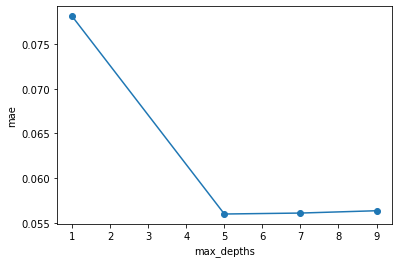

In [98]:
plt.plot(max_depths,scores,'o-')
plt.ylabel("mae")
plt.xlabel("max_depths")
print("best max_depths {}".format(max_depths[np.argmin(scores)]))